In [1]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['ps.useafm']=True
matplotlib.rcParams['pdf.use14corefonts']=True
matplotlib.rcParams['text.usetex']=True

import seaborn as sns
sns.set(font_scale=2)
sns.set_style("whitegrid", {'axes.edgecolor': '.1', 'grid.color': '.1', 'grid.linestyle': '--'})

In [2]:
N_train = 200
N_trial = 10

n, sigma = 500, 0.1
ms = [50, 1000, 1000]

# Define paths
dir_name_synth = ['Packing', 'MaxFlow', 'MinCostFlow']
dir_name_netlib = ['GROW7', 'ISRAEL', 'SC205', 'SCAGR25', 'STAIR']
dir_names = dir_name_synth + dir_name_netlib

data_paths = [
    f'data/{dir_name}/m{m}_n{n}_sigma{sigma}.npz' for dir_name, m in zip(dir_name_synth, ms)
]
data_paths += [
    f'data/{dir_name}/sigma{sigma}.npz' for dir_name in dir_name_netlib
]

result_paths = [
    f'result/{dir_name}/m{m}_n{n}_sigma{sigma}_sga_rand_init_N_train{N_train}.pkl' for dir_name, m in zip(dir_name_synth, ms)
]
result_paths += [
    f'result/{dir_name}/sigma{sigma}out_sga_rand_init_N_train{N_train}.pkl' for dir_name in dir_name_netlib
]

training_paths = [
    f'model/{dir_name}/m{m}_n{n}_sigma{sigma}_sga_rand_init_N_train{N_train}_training_time.pkl' for dir_name, m in zip(dir_name_synth, ms)
]
training_paths += [
    f'model/{dir_name}/sigma{sigma}out_sga_rand_init_N_train{N_train}_training_time.pkl' for dir_name in dir_name_netlib
]

# Define plot parameters
color_dict = {"full": "#636363", "random": "darkolivegreen", "pca": "#1f77b4", "sgd": "#ff7f0e"}
label_order = ['full', 'random', 'pca', 'sgd']
label_dict = {"full": r"\textsf{Full}", "random": r"\textsf{ColRand}", "pca": r"\textsf{PCA}", "sgd": r"\textsf{SGA}"}

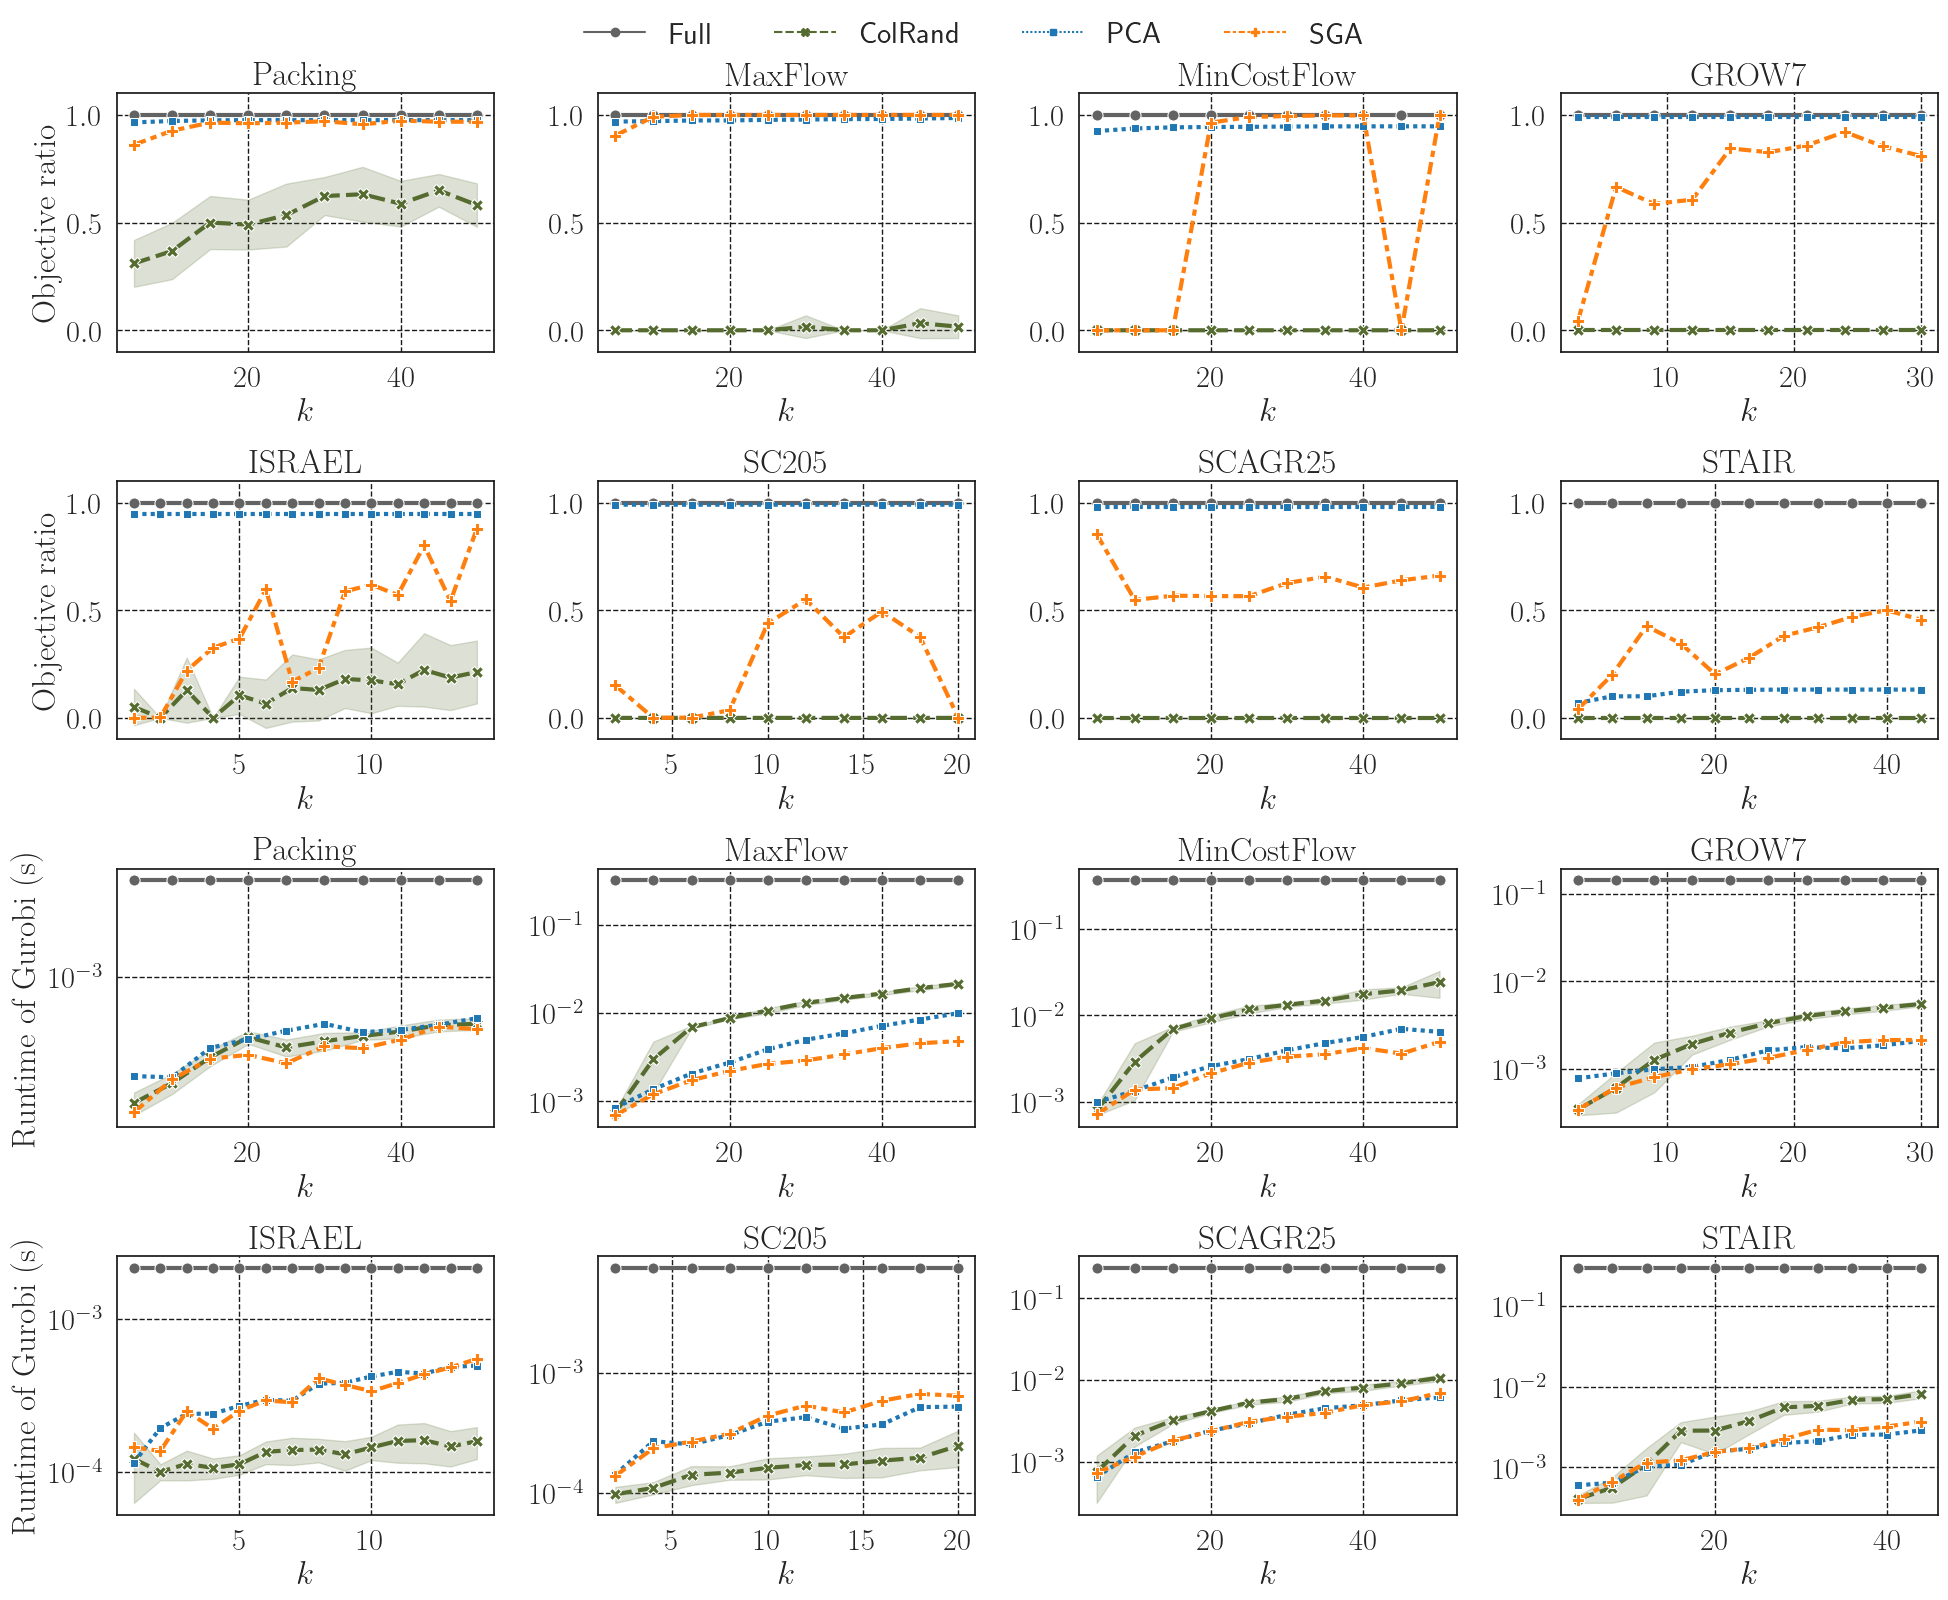

In [3]:
# Create 4x4 subplots
fig, axs = plt.subplots(4, 4, figsize=(20, 16))

for i, path in enumerate(result_paths):
    df = pd.read_pickle(path)

    # add ratio and make plot_df
    df['objective_value_ratio'] = df['objective_value'] / np.tile(df[df['method'] == 'full']['objective_value'].values, len(df)//len(df[df['method'] == 'full']))
    plot_df = df.groupby(['method', 'k', 'trial']).mean().reset_index()

    # Plot k vs. objective_value_ratio
    ax1 = axs[i//4, i%4]
    sns.lineplot(data=plot_df, x='k', y='objective_value_ratio', hue='method', hue_order=label_order, style='method', style_order=label_order, errorbar='sd', err_style='band', palette=color_dict, markers=True, dashes=True, ax=ax1, linewidth=3, markersize=8)
    ax1.set_xlabel(r'$k$')
    ax1.set_title(fr"\rm {dir_names[i]}") 
    if i % 4 == 0:  # only set y-label for the leftmost figures
        ax1.set_ylabel(r'\rm Objective ratio')
    else:  # remove y-label for the other figures
        ax1.set_ylabel('')
    ax1.set_ylim([-0.1, 1.1])

    # Plot k vs. solver time
    ax2 = axs[i//4 + 2, i%4]
    sns.lineplot(data=plot_df, x='k', y='time_solver', hue='method', hue_order=label_order, style='method', style_order=label_order, errorbar='sd', err_style='band', palette=color_dict, markers=True, dashes=True, ax=ax2, linewidth=3, markersize=8)
    ax2.set_yscale('log')
    ax2.set_xlabel(r'$k$')
    ax2.set_title(fr"\rm {dir_names[i]}") 
    if i % 4 == 0:  # only set y-label for the leftmost figures
        ax2.set_ylabel(r'\rm Runtime of Gurobi (s)')
    else:  # remove y-label for the other figures
        ax2.set_ylabel('')

    # Edit labels
    handles, labels = ax1.get_legend_handles_labels()
    labels = [label_dict[label] for label in label_order]
    
    # Remove the legend
    ax1.get_legend().remove()
    ax2.get_legend().remove()

# Set the legend for the entire figure
legend = fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.02), frameon=False)


plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
#plt.savefig('plot_result.pdf', bbox_inches='tight')
plt.savefig('plot_result_sigma0.1out_all.pdf', bbox_inches='tight')

In [16]:
df

,method,trial,k,objective_value,time_solver,time_projection,time_retrieval,violation_Ab,violation_NN,objective_value_ratio
0,full,0,4,12.946110,0.182460,0.000000,0.000000,1.350697e-12,2.295291e-13,1.000000
1,full,0,4,11.454561,0.249696,0.000000,0.000000,6.119549e-13,1.623415e-13,1.000000
2,full,0,4,20.854305,0.289259,0.000000,0.000000,6.636913e-13,1.992850e-13,1.000000
3,full,0,4,19.387515,0.316683,0.000000,0.000000,4.469758e-13,1.088574e-13,1.000000
4,full,0,4,17.689370,0.290654,0.000000,0.000000,1.058709e-12,1.593392e-12,1.000000
...,...,...,...,...,...,...,...,...,...,...
14295,sgd,0,44,9.749530,0.004554,0.001119,0.000013,8.201607e-13,-0.000000e+00,0.512144
14296,sgd,0,44,10.178962,0.004438,0.000536,0.002327,8.201607e-13,-0.000000e+00,0.512144
14297,sgd,0,44,8.644475,0.003531,0.000596,0.000014,8.201607e-13,-0.000000e+00,0.512144
14298,sgd,0,44,8.979924,0.004813,0.000648,0.000022,8.201607e-13,-0.000000e+00,0.512144


In [17]:
#excact df with method = sgd or pca
for i, path in enumerate(result_paths):
    df = pd.read_pickle(path)
    df['objective_value_ratio'] = df['objective_value'] / np.tile(df[df['method'] == 'full']['objective_value'].values, len(df)//len(df[df['method'] == 'full']))
    df['time_ratio'] = np.tile(df[df['method'] == 'full']['time_solver'].values, len(df)//len(df[df['method'] == 'full'])) / df['time_solver']
    
    df_sgd = df[df['method'] == 'sgd']
    df_pca = df[df['method'] == 'pca']
    kmax = np.max(df_sgd['k'])
    df_sgd = df_sgd[df_sgd['k'] == kmax]
    df_pca = df_pca[df_pca['k'] == kmax]
    
    print(f'{dir_names[i]} sgd: {np.mean(df_sgd["objective_value_ratio"])}')
    print(f'{dir_names[i]} pca: {np.mean(df_pca["objective_value_ratio"])}')

    print(f'{dir_names[i]} sgd: {np.mean(df_sgd["time_ratio"])}')
    print(f'{dir_names[i]} pca: {np.mean(df_pca["time_ratio"])}')
    

Packing sgd: 0.9916977357867285
Packing pca: 0.9758270755439535
Packing sgd: 8.433905917173552
Packing pca: 8.465467703841128
MaxFlow sgd: 0.9999973412469653
MaxFlow pca: 0.9859470061221461
MaxFlow sgd: 31.007998990766822
MaxFlow pca: 31.25149653428785
MinCostFlow sgd: 0.9988165696901646
MinCostFlow pca: 0.9470703198296908
MinCostFlow sgd: 55.55405912249654
MinCostFlow pca: 50.832759771820946
GROW7 sgd: 0.991875930106378
GROW7 pca: 0.9918678745296446
GROW7 sgd: 56.020478473592895
GROW7 pca: 70.02980104755967
ISRAEL sgd: 0.8274060406477166
ISRAEL pca: 0.9488134794149136
ISRAEL sgd: 4.119827551501305
ISRAEL pca: 4.77772337353979
SC205 sgd: 0.9899999923130076
SC205 pca: 0.9899479254231298
SC205 sgd: 15.58693881018927
SC205 pca: 14.295419552350314
SCAGR25 sgd: 0.9758150840637164
SCAGR25 pca: 0.9791972136412537
SCAGR25 sgd: 42.5881952213537
SCAGR25 pca: 46.479002496074365
STAIR sgd: 0.5121444371442856
STAIR pca: 0.13146399575504092
STAIR sgd: 71.50859908013099
STAIR pca: 87.71083328126505


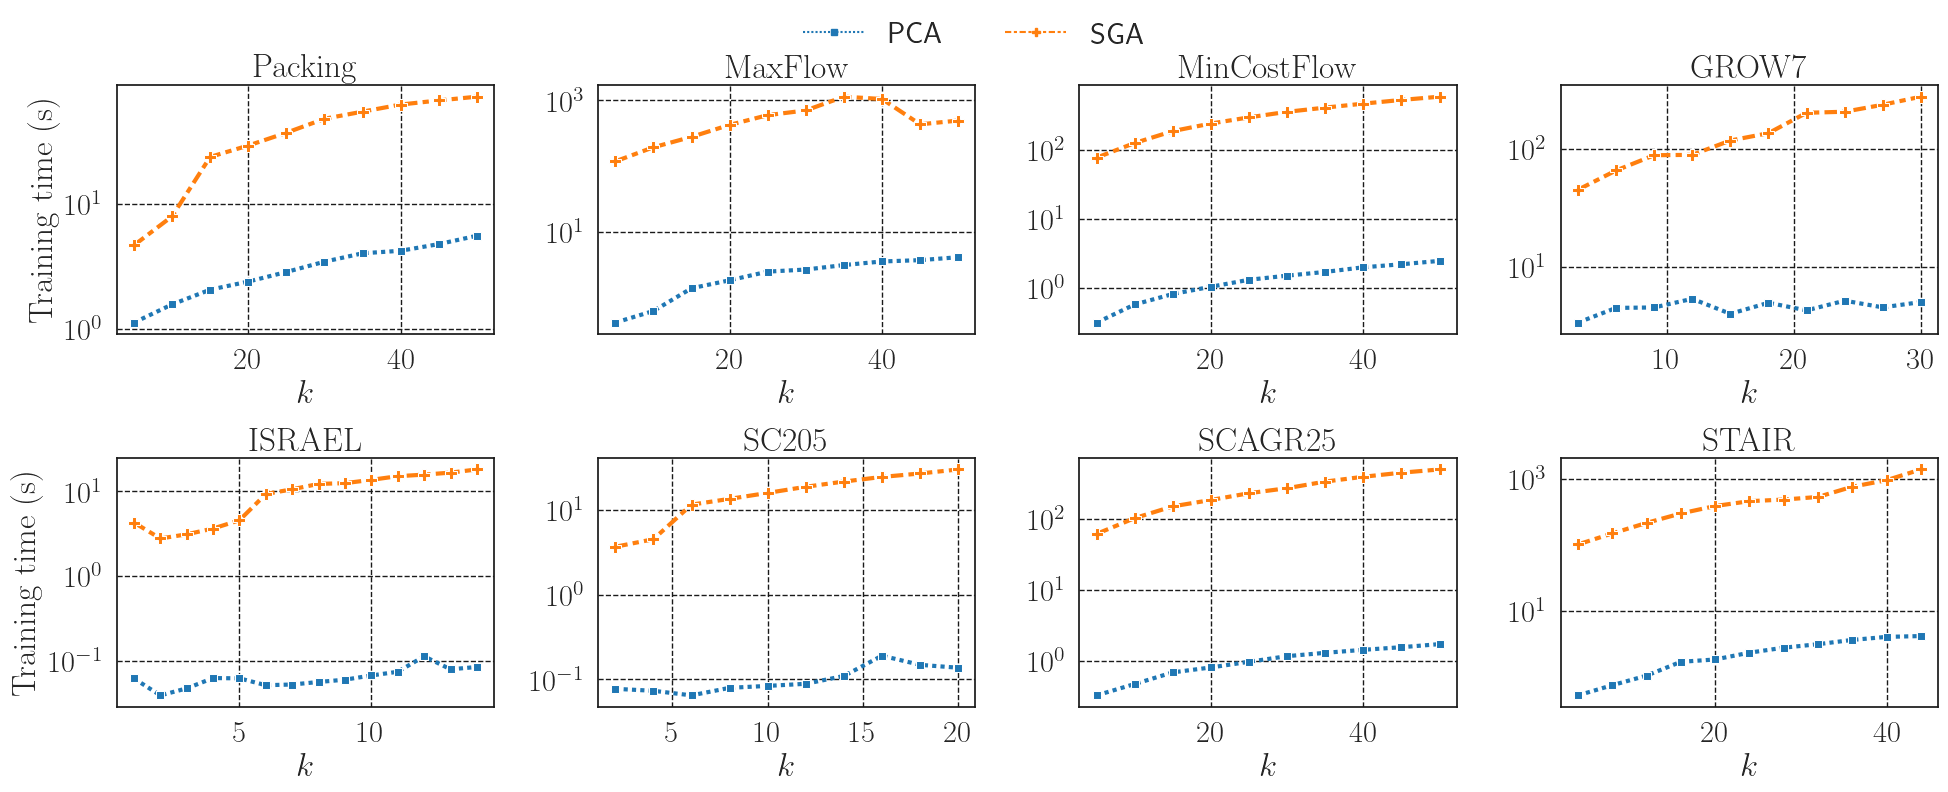

In [18]:
# Create 4x4 subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 8))

for i, path in enumerate(training_paths):
    # Load your DataFrame
    plot_df = pd.read_pickle(path)

    # Add 'full' and 'random' to the 'method' column with no data
    plot_df = pd.concat([
            pd.DataFrame({'method': ['full', 'random'], 'k': [None, None], 'training_time': [None, None]}),
            plot_df
        ]).reset_index().drop(columns=['index'])


    # Plot k vs. objective_value_ratio
    ax = axs[i//4, i%4]
    sns.lineplot(data=plot_df, x='k', y='training_time', hue='method', hue_order=label_order, style='method', style_order=label_order, errorbar='sd', err_style='band', palette=color_dict, markers=True, dashes=True, ax=ax, linewidth=3, markersize=8)
    ax.set_xlabel(r'$k$')
    ax.set_yscale('log')
    ax.set_title(fr"\rm {dir_names[i]}") 
    if i % 4 == 0:  # only set y-label for the leftmost figures
        ax.set_ylabel(r'\rm Training time (s)')
    else:  # remove y-label for the other figures
        ax.set_ylabel('')

    # Get the current handles and labels
    handles, labels = ax.get_legend_handles_labels()

    # Create a dictionary of labels and their corresponding handles
    label_handle_dict = dict(zip(labels, handles))

    # Create new handles and labels lists in the desired order
    new_handles = [label_handle_dict[label] for label in label_order]
    new_labels = [label_dict[label] for label in label_order]
    
    # Remove the legend
    ax.get_legend().remove()

# Set the legend for the entire figure
legend = fig.legend(new_handles[2:], new_labels[2:], loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.03), frameon=False)

# Make the legend transparent
legend.get_frame().set_alpha(None)

# Remove the boundary lines
legend.get_frame().set_edgecolor("none")


plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.savefig('training_time_out.pdf', bbox_inches='tight')